# AB Testing Hands on Exercises

In [16]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("poster")
sns.set_style("whitegrid")
%config InlineBackend.figure_format='retina'
import pymc as pm
import arviz as az
import numpy
import pymc

np.set_printoptions(formatter={'float': lambda x: "{0:0.1f}%".format(x)})

## Exercise 1

1. Build a model for estimating the conversion rate for version B of the website.
  * We included Model A for you already
2. Extract the posterior of plausible values of the conversion rate.
3. Plot a histogram of plausible values for the conversion rate of version A *and* version B.
4. Compute the probability that version A of the website is better than that of version B.

In [2]:
np.random.seed(3)
a = sps.bernoulli(p=.1)
b = sps.bernoulli(p=.15)

conversions = a_conversions = a.rvs(100)
b_conversions = b.rvs(100)

## Solution 1

In [3]:
with pm.Model():
    conversion_rate = pm.Beta("conversion_rate_a", 2, 10)
    how_likely = pm.Bernoulli("how_likely", 
                              p=conversion_rate, 
                              observed=a_conversions)
    
    idata_a = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [conversion_rate_a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [4]:
conversion_a = idata_a.posterior.stack(draws=("chain", "draw"))["conversion_rate_a"].values

In [5]:
with pm.Model():
    conversion_rate = pm.Beta("conversion_rate_b", 2, 10)
    how_likely = pm.Bernoulli("how_likely", 
                              p=conversion_rate, 
                              observed=b_conversions)
    
    idata_b = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [conversion_rate_b]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [6]:
conversion_b = idata_b.posterior.stack(draws=("chain", "draw"))["conversion_rate_b"].values

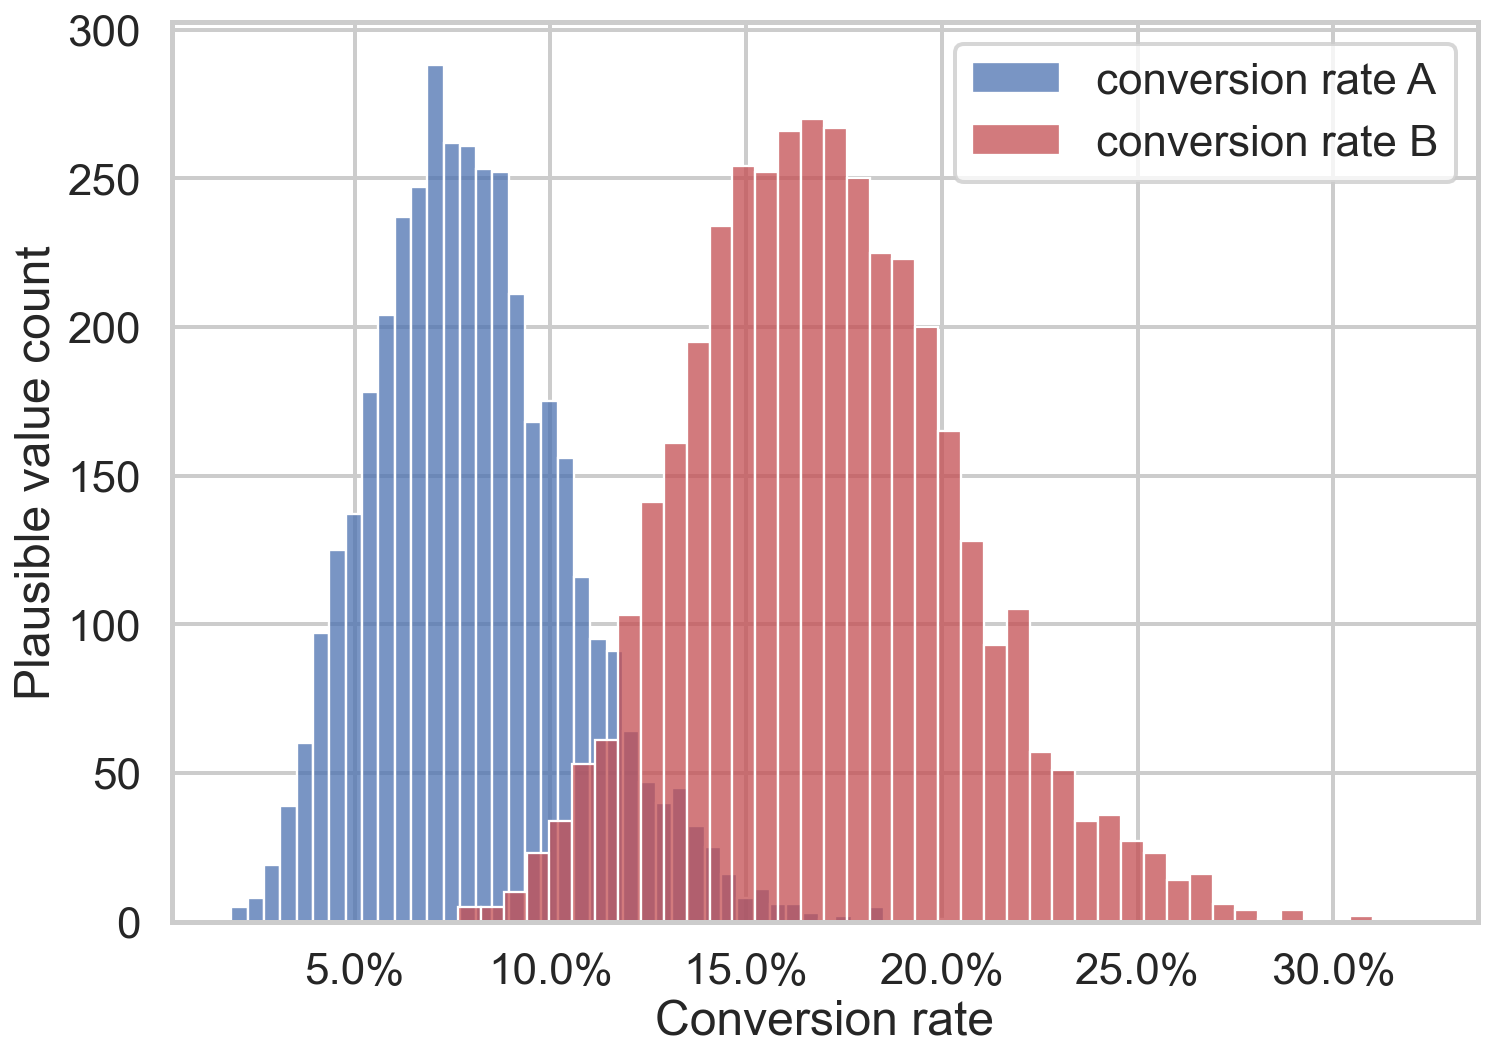

In [17]:
ax = sns.histplot(conversion_a, label="conversion rate A")
sns.histplot(conversion_b, label="conversion rate B", color="r", ax=ax)
ax.legend()
ax.set_xlabel("Conversion rate")
ax.set_ylabel("Plausible value count")

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

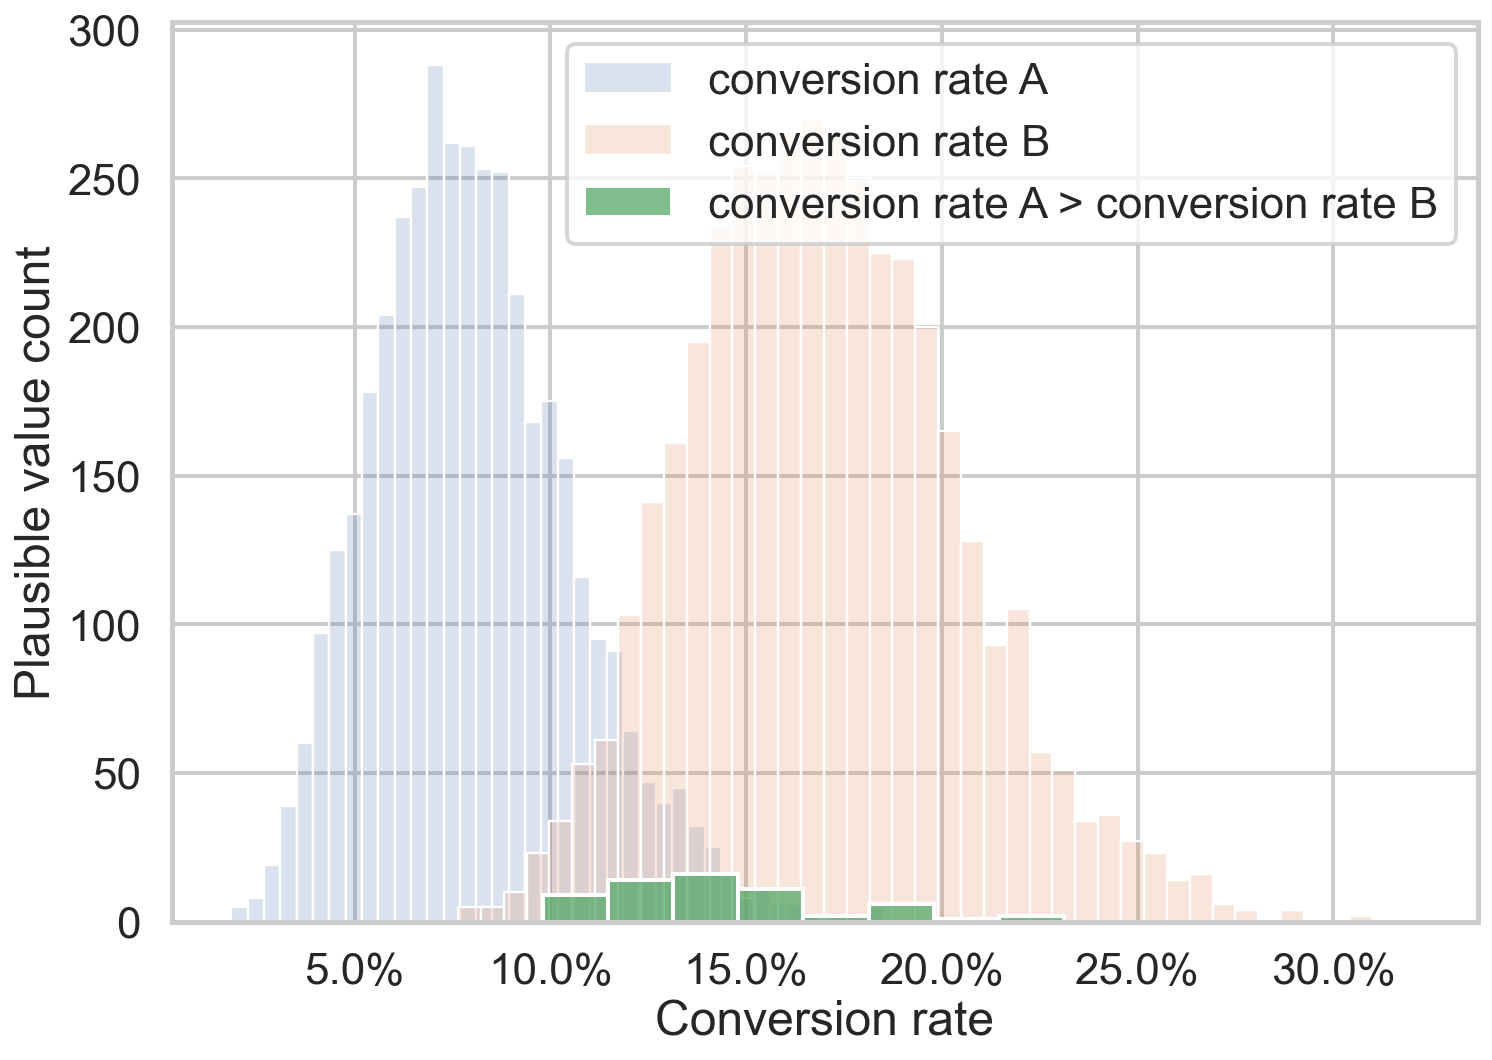

In [18]:
ax = sns.histplot(conversion_a, label="conversion rate A", color="C0", alpha=.2)
sns.histplot(conversion_b, label="conversion rate B", color="C1", alpha=.2, ax=ax)
sns.histplot(conversion_a[conversion_a > conversion_b], 
             label="conversion rate A > conversion rate B", color="C2", ax=ax)

ax.legend()
ax.set_xlabel("Conversion rate")
ax.set_ylabel("Plausible value count")

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

In [9]:
a_gt_b = (conversion_a > 
          conversion_b)
a_gt_b

array([False, False, False, ..., False, False, False])

In [10]:
np.mean(a_gt_b)

0.01525

## Exercise 2

Instead of a `Bernoulli` likelihood, which is the likelihood for binary data, we can also code the data differently and use a different likelihood. Instead of 100 binary events, we can also just say how many conversions we observed out of how many visitors (for version A: 7 out of 100).

Note that we can't always do this, but here we can because we do not care about the order with which the data came in (i.e. shuffling would not change our inferences).

The likelihood for successes out of a specific number of trials is the `Binomial`. Use the [documentation on the `Binomial`](https://docs.pymc.io/en/latest/api/distributions/generated/pymc.Binomial.html#pymc.Binomial) to figure out what to pass in instead of the binary events.

## Solution 2

In [11]:
import pymc as pm

with pm.Model() as model_a:
    # Parameter = prior solution space
    conversion_rate = pm.Beta("conversion_rate_a", 
                              alpha=2, beta=10)
    
    # Evaluator: likelihood function
    how_likely = pm.Binomial("how_likely", n=100,
                             p=conversion_rate, 
                             observed=7)
    
    # Posterior solution space
    plausible_values_a = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [conversion_rate_a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
